<a href="https://colab.research.google.com/github/ivandorte/python_gis/blob/main/07_loop_vs_numpy_vs_numba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install numba
! pip install simple_benchmark

In [133]:
import numpy as np
from numba import jit
from random import randint, randrange

In [94]:
# A simple function to check if a point lies inside a circle
def inside_loop(points, circle_ctx, circle_radius):
    inside = []
    for point in points:
        inside.append((point[0] - circle_ctx[0]) ** 2 + (point[1] - circle_ctx[1]) ** 2 <= (circle_radius ** 2))
    return inside

In [95]:
# Numpy function to check if an array of points are inside a circle
def inside_vect(points, circle_ctx, circle_radius):
    return (points[:,0] - circle_ctx[0]) ** 2 + (points[:,1] - circle_ctx[1]) ** 2 <= (circle_radius ** 2)

In [112]:
# Numba ugly function to check if an array of points are inside a circle
@jit(nopython=True, cache=True)
def inside_numba(points, circle_ctx, circle_radius):
    inside = np.zeros(len(points), dtype=np.bool_)
    for n in range(len(points)):
        inside[n] = (points[n][0] - circle_ctx[0]) ** 2 + (points[n][1] - circle_ctx[1]) ** 2 <= (circle_radius ** 2)
    return inside

In [233]:
# Generate an array (n, 2) of random points
num_points = 1000000
points = np.random.uniform(-15, 10, (num_points, 2))
# A circle with 1,1 centre and a certain radius
circle_ctx = (1, 1)
circle_radius = 4

In [235]:
%%time
loop_result = inside_loop(points, circle_ctx, circle_radius)

CPU times: user 2.51 s, sys: 6.18 ms, total: 2.52 s
Wall time: 2.53 s


In [234]:
%%time
numpy_result = inside_vect(points, circle_ctx, circle_radius)

CPU times: user 9.63 ms, sys: 0 ns, total: 9.63 ms
Wall time: 11.8 ms


In [236]:
%%time
numba_result = inside_numba(points, circle_ctx, circle_radius)

CPU times: user 3.32 ms, sys: 0 ns, total: 3.32 ms
Wall time: 3.34 ms


In [237]:
points_inside = points[numpy_result]
print(f"{points_inside.size} inside")
print(f"{num_points - points_inside.size} outside")

160512 inside
839488 outside


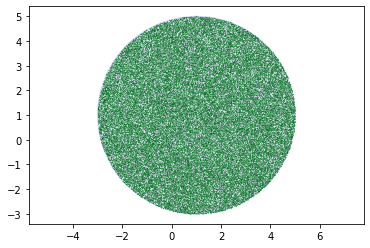

In [238]:
# Creates a figure and one subplot
fig, ax = plt.subplots()

# Plot the circle
ax.add_patch(plt.Circle(circle_ctx, circle_radius, color='b', alpha=0.1))

# Plot the points
ax.scatter(points_inside[:,0], points_inside[:,1], c='green', s=0.01)

# Show the plot
ax.set_aspect('equal', adjustable='datalim')
plt.show()